##### import pandas as pd 
import numpy as np
data = pd.read_csv('model data final.csv')
data

In [1]:
import pandas as pd
import numpy as np 
data = pd.read_csv('model data final.csv')
data.set_index('Day',inplace=True)
stock = data
stock.drop(['Year','Season','Month','GDP Season','Close'],axis=1,inplace=True)
stock

,Day_Num,Volume,C1,C2,G,NX(yi mei yuan),ISM,new_cases,new_deaths,GDP_per_day
Day,,,,,,,,,,
2015/1/2,42006,76270000,-15.776760,4.915455,1214.892,-435.9,55.1,0.0,0.0,2.610000e+11
2015/1/5,42009,116160000,-16.496330,5.167977,1214.892,-435.9,55.1,0.0,0.0,2.680000e+11
2015/1/6,42010,101870000,-16.548551,5.513747,1214.892,-435.9,55.1,0.0,0.0,2.650000e+11
2015/1/7,42011,91030000,-13.489590,4.621326,1214.892,-435.9,55.1,0.0,0.0,2.680000e+11
2015/1/8,42012,114890000,-10.824681,4.108397,1214.892,-435.9,55.1,0.0,0.0,2.670000e+11
...,...,...,...,...,...,...,...,...,...,...
2020/11/19,44154,331330000,82.301354,11.495220,NaN,NaN,59.3,187963.0,1987.0,NaN
2020/11/20,44155,305350000,80.881013,11.196589,NaN,NaN,59.3,196010.0,1917.0,NaN
2020/11/23,44158,387200000,80.875876,11.488299,NaN,NaN,59.3,171462.0,913.0,NaN


In [2]:
covid = data[['new_cases','new_deaths']]
covid.fillna(0,inplace=True)

from sklearn.decomposition import PCA  # 主成分分析

# pca 
pca = PCA(n_components=0.9)  # 一般 n_components 为0.9-0.95 左右
pca_data = pca.fit_transform(covid)
pca_data = pd.DataFrame(pca_data)
pca_data.index = data.index 
pca_data


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 0.8))  
scaled_data = scaler.fit_transform(pca_data)
scaled_data = pd.DataFrame(scaled_data)
scaled_data.index = data.index
covid_data = scaled_data
covid_data
stock['new_cases'] = covid_data
stock.drop('new_deaths',axis=1,inplace=True)
stock

C:\Users\june.wu\Anaconda3\lib\site-packages\pandas\core\frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,Day_Num,Volume,C1,C2,G,NX(yi mei yuan),ISM,new_cases,GDP_per_day
Day,,,,,,,,,
2015/1/2,42006,76270000,-15.776760,4.915455,1214.892,-435.9,55.1,0.000000e+00,2.610000e+11
2015/1/5,42009,116160000,-16.496330,5.167977,1214.892,-435.9,55.1,4.059253e-16,2.680000e+11
2015/1/6,42010,101870000,-16.548551,5.513747,1214.892,-435.9,55.1,4.059253e-16,2.650000e+11
2015/1/7,42011,91030000,-13.489590,4.621326,1214.892,-435.9,55.1,4.059253e-16,2.680000e+11
2015/1/8,42012,114890000,-10.824681,4.108397,1214.892,-435.9,55.1,4.059253e-16,2.670000e+11
...,...,...,...,...,...,...,...,...,...
2020/11/19,44154,331330000,82.301354,11.495220,NaN,NaN,59.3,7.671654e-01,NaN
2020/11/20,44155,305350000,80.881013,11.196589,NaN,NaN,59.3,8.000000e-01,NaN
2020/11/23,44158,387200000,80.875876,11.488299,NaN,NaN,59.3,6.997648e-01,NaN


In [3]:
# 查看皮尔森相关系数
corr = stock.corr()
corr

,Day_Num,Volume,C1,C2,G,NX(yi mei yuan),ISM,new_cases,GDP_per_day
Day_Num,1.000000,0.649165,0.895717,-0.152521,0.963462,-0.569701,0.005456,0.459450,0.294256
Volume,0.649165,1.000000,0.500977,-0.103619,0.570620,-0.426589,0.246684,0.265774,0.111386
C1,0.895717,0.500977,1.000000,-0.002671,0.930333,-0.547460,-0.156658,0.587419,0.213522
C2,-0.152521,-0.103619,-0.002671,1.000000,-0.090768,-0.166053,-0.234079,0.494676,-0.719100
G,0.963462,0.570620,0.930333,-0.090768,1.000000,-0.603082,-0.195012,0.531707,0.206118
NX(yi mei yuan),-0.569701,-0.426589,-0.547460,-0.166053,-0.603082,1.000000,-0.219766,-0.565264,-0.050525
ISM,0.005456,0.246684,-0.156658,-0.234079,-0.195012,-0.219766,1.000000,0.015499,0.386058
new_cases,0.459450,0.265774,0.587419,0.494676,0.531707,-0.565264,0.015499,1.000000,-0.365767
GDP_per_day,0.294256,0.111386,0.213522,-0.719100,0.206118,-0.050525,0.386058,-0.365767,1.000000


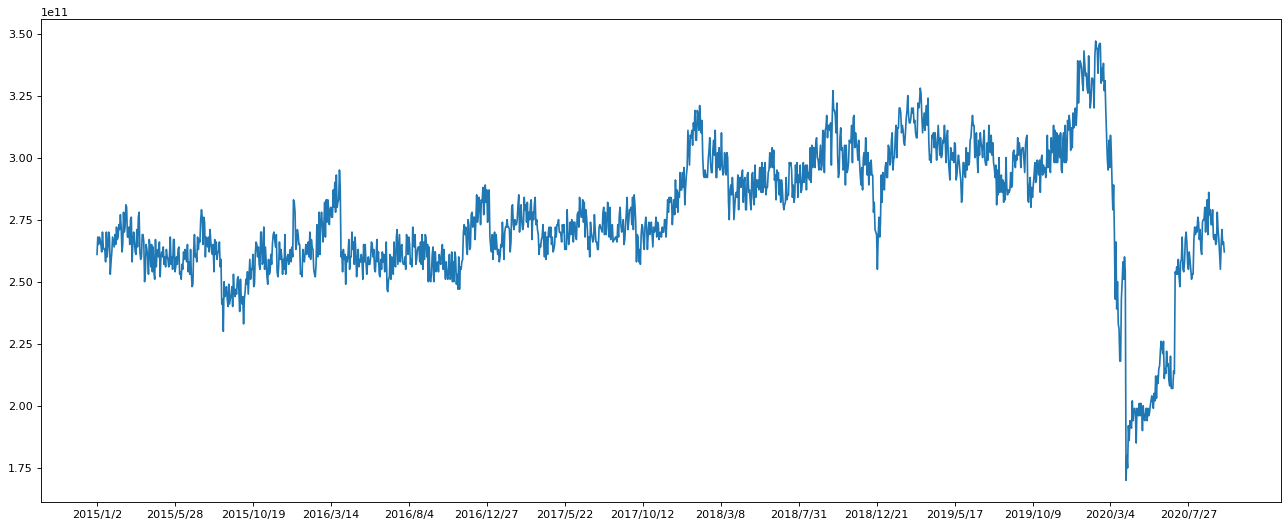

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8),dpi=80)
plt.plot(stock['GDP_per_day'])
plt.xticks(ticks=stock.index[::100],labels=stock.index[::100])
plt.show()

In [5]:
time_stamp = 1 # 划分步长
train_num = 1200  # 设定训练集的数量


# 划分训练集与验证集
train = stock[:train_num + time_stamp]
test = stock[train_num - time_stamp :]


# 归一化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))  
scaled_data = scaler.fit_transform(train)
x_train, y_train = [], []
scaled_data = scaled_data.tolist()


In [6]:
# 训练集
for i in range(time_stamp, len(train)):
    x_train.append(scaled_data[i - time_stamp:i])
    y_train.append(scaled_data[i][-1])
x_train, y_train = np.array(x_train), np.array(y_train)

# 验证集
scaled_data = scaler.fit_transform(test)
scaled_data = scaled_data.tolist()
x_test, y_test = [], []
for i in range(time_stamp, len(test)):
    x_test.append(scaled_data[i - time_stamp:i])
    y_test.append(scaled_data[i][-1])
    print(scaled_data[i - time_stamp:i])
    print(scaled_data[i][-1])
x_test , y_test = np.array(x_test) , np.array(y_test)

[[0.0, 0.19092837173431026, 0.5032894641387858, 0.2438458948075102, 0.0, 0.2695628340413868, 0.3539325842696628, 0.0, 0.6666666666666666]]
0.6440677966101694
[[0.0024154589372074042, 0.12521690928371734, 0.524865375129681, 0.24297008649911764, 0.0, 0.2695628340413868, 0.3539325842696628, 0.0, 0.6440677966101694]]
0.672316384180791
[[0.004830917874400598, 0.15850043381856743, 0.5301318615526417, 0.24686527871670083, 0.0, 0.2695628340413868, 0.3539325842696628, 0.0, 0.672316384180791]]
0.6949152542372882
[[0.007246376811593791, 0.236105755326328, 0.5277812002223033, 0.2541916871511243, 0.0, 0.2695628340413868, 0.3539325842696628, 0.0, 0.6949152542372882]]
0.7231638418079097
[[0.014492753623187582, 0.11143111925190399, 0.5110467626103532, 0.2502015331624382, 0.0, 0.2695628340413868, 0.3539325842696628, 0.0, 0.7231638418079097]]
0.6779661016949153
[[0.016908212560394986, 0.19203701918442112, 0.4892457773377575, 0.26015683336033346, 0.0, 0.2695628340413868, 0.3539325842696628, 0.0, 0.677966

In [7]:
#导入序贯模型
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
# 超参数
epochs = 3 # 周期参数
batch_size = 8   # 每组样本个数
# LSTM 参数: return_sequences=True LSTM输出为一个序列。默认为False，输出一个值。
# input_dim：输入单个样本特征值的维度
# input_length：输入的时间点长度
model = Sequential() # 贯序模型
# 加入LSTM 模型
model.add(LSTM(units=100, return_sequences=True, input_dim=x_train.shape[-1], input_length=x_train.shape[1]))
# 加入LSTM 模型
model.add(LSTM(units=50))
# 设置全连接层
model.add(Dense(1))
# 设置优化器
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/3
150/150 [==============================] - 0s 2ms/step - loss: 0.0353
Epoch 2/3
150/150 [==============================] - 0s 2ms/step - loss: 0.0076
Epoch 3/3
150/150 [==============================] - 0s 2ms/step - loss: 0.0065


In [8]:
# 预测每日的GDP
predict_close_price = model.predict(x_test)
scaler.fit_transform(pd.DataFrame(test['GDP_per_day'].values))
# 反归一化
pred = scaler.inverse_transform(predict_close_price)
y_test = scaler.inverse_transform([y_test])
predict_close_price

array([[0.43955585],
       [0.42828134],
       [0.44355834],
       [0.4580603 ],
       [0.46425608],
       [0.44637635],
       [0.44753587],
       [0.46838418],
       [0.46131316],
       [0.45618045],
       [0.47513112],
       [0.43977198],
       [0.47478524],
       [0.48159346],
       [0.46239808],
       [0.47002506],
       [0.46145517],
       [0.46744078],
       [0.4620585 ],
       [0.47419512],
       [0.50981706],
       [0.47373232],
       [0.49513596],
       [0.47650802],
       [0.46800116],
       [0.5066095 ],
       [0.49613082],
       [0.49976283],
       [0.5235114 ],
       [0.48399174],
       [0.51775205],
       [0.48371267],
       [0.51434463],
       [0.4805092 ],
       [0.4959525 ],
       [0.51643264],
       [0.48438355],
       [0.5081299 ],
       [0.46522444],
       [0.46452782],
       [0.49831322],
       [0.50405186],
       [0.4733149 ],
       [0.5138546 ],
       [0.47384167],
       [0.47612384],
       [0.5234659 ],
       [0.511

In [9]:
predict_close_price.shape

(287, 1)

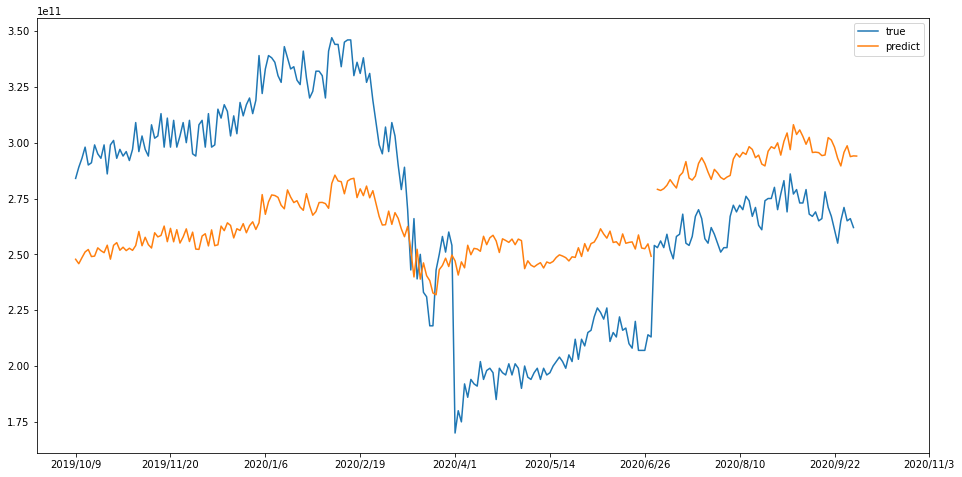

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
dict_data = {
    'Predictions': pred.reshape(1,-1)[0] ,# 设置放大参数
    'GDP_per_day': y_test[0]
}
data_pd = pd.DataFrame(dict_data)


plt.plot(data_pd['GDP_per_day'],label = 'true')
plt.plot(data_pd['Predictions'],label = 'predict')

plt.xticks(data_pd.index[::30],stock[train_num:].index[::30])
plt.legend()
plt.show()

In [11]:
data_pd.to_csv('result.csv')